In [1]:
import yfinance as yf
import os
import pandas as pd
import numpy as np

sp500_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500 = sp500_table[0]
sp500tickers = sp500['Symbol'].tolist()

# Download grouped data
data = yf.download(
    tickers=sp500tickers,
    start="2020-01-01",
    end="2025-01-01",
    interval="1d",
    group_by="ticker",
    auto_adjust=False,
    progress=True
)

# Create directory to save files
save_path = "/content/drive/MyDrive/StockData"
os.makedirs(save_path, exist_ok=True)

df = data.stack(level=0).reset_index()
df.columns = ['Date','Ticker','Open','High','Low','Close','Adj Close','Volume']

output_path = os.path.join(save_path, "sp500_data.csv")
df.to_csv(output_path, index=False)

print(f"Saved to {output_path}")

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-01-01)')
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
<ipython-input-1-afa800d8478c>:25: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = data.stack(level=0).reset_index()


Saved to /content/drive/MyDrive/StockData/sp500_data.csv


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
print("Data Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nInfinite values per column:")
numeric_cols = df.select_dtypes(include=np.number).columns
print(np.isinf(df[numeric_cols]).sum())

Data Shape: (622574, 8)

Data Types:
Date         datetime64[ns]
Ticker               object
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

First 5 rows:
        Date Ticker       Open       High        Low      Close  Adj Close  \
0 2020-01-02      A  85.900002  86.349998  85.199997  85.949997  82.885254   
1 2020-01-02   AAPL  74.059998  75.150002  73.797501  75.087502  72.620819   
2 2020-01-02   ABBV  89.080002  89.570000  88.510002  89.550003  70.934242   
3 2020-01-02    ABT  86.059998  86.959999  85.800003  86.949997  78.908432   
4 2020-01-02   ACGL  43.009998  43.400002  42.880001  43.400002  41.268997   

        Volume  
0    1410500.0  
1  135480400.0  
2    5639200.0  
3    4969000.0  
4    1376700.0  

Summary Statistics:
                                Date           Open           High  \
count                         622574  622574.000

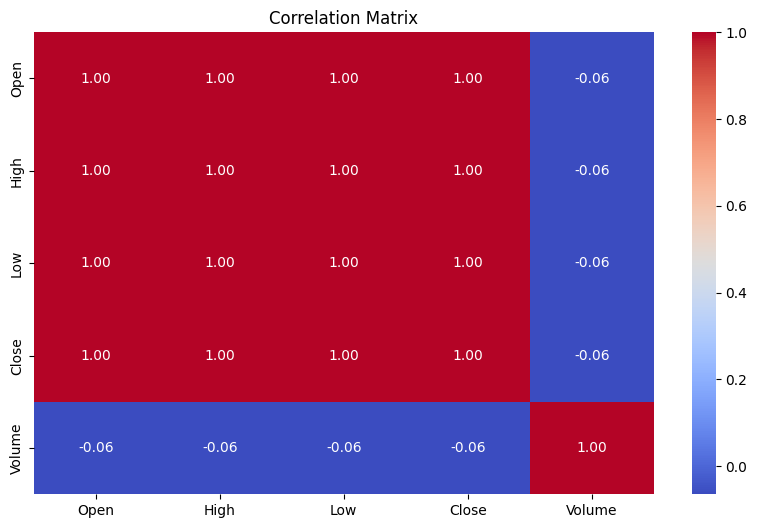

In [6]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

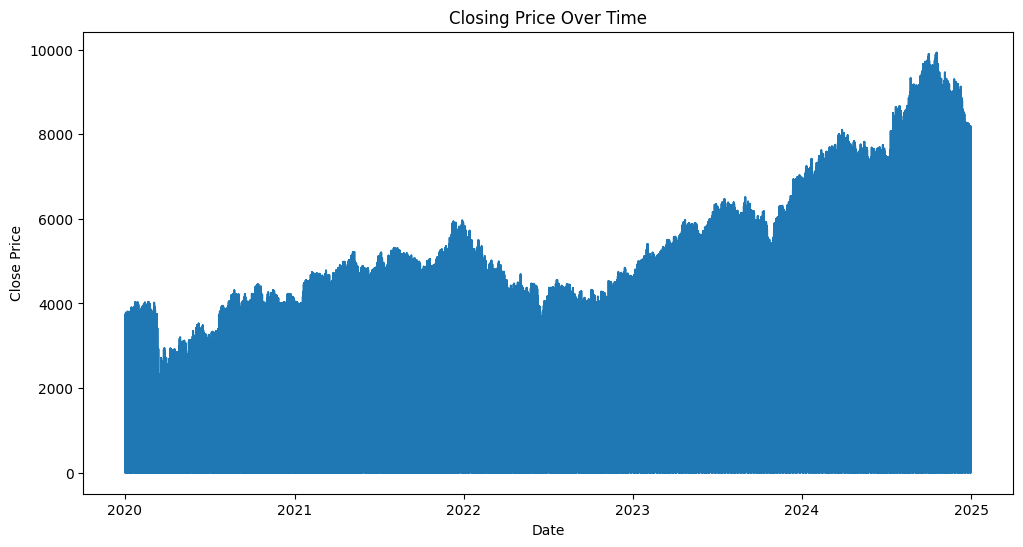

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()